#**REQUIRED DEPENDENCIES**

In [ ]:
import torch
!pip install tools

     |████████████████████████████████| 92kB 4.7MB/s 
  Created wheel for tools: filename=tools-0.1.9-cp37-none-any.whl size=46760 sha256=696a1a7b30c6da39312f40c0a23e7ffb104e9b6c80ffead791485c8a01877c72
  Stored in directory: /root/.cache/pip/wheels/87/67/9b/1ca7dcb0b9ebfdc23a00c85a0644abb6fb14f9159a0df8e067
  Created wheel for pytils: filename=pytils-0.3-cp37-none-any.whl size=40356 sha256=61618d713ea03f324df02a363e4bcbccbf1bbb35610cab2cafdf5278a46fbfdb
  Stored in directory: /root/.cache/pip/wheels/d6/f9/dc/4f07d8ee40d9cfca9973b3f4aeff99d0bb69900e5f3dffbf32
Successfully built tools pytils


In [ ]:
import tools

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model=torch.load('/content/gdrive/MyDrive/craft_mlt_25k.pth')

In [ ]:
print(model)

OrderedDict([('module.basenet.slice1.0.weight', tensor([[[[ 8.2180e-02,  2.6115e-02,  7.4751e-02],
          [ 4.8457e-02, -3.5473e-02,  1.7109e-02],
          [ 8.1456e-02,  7.7803e-02,  8.3691e-02]],

         [[-4.2000e-02, -1.7737e-01, -4.8277e-02],
          [-1.0885e-01, -2.7710e-01, -1.3671e-01],
          [-1.1480e-03, -5.8306e-02,  1.9195e-02]],

         [[ 2.1829e-02, -7.2936e-02,  3.8892e-02],
          [-3.3420e-02, -1.5790e-01, -4.0794e-02],
          [ 4.8499e-02,  1.2457e-02,  8.2594e-02]]],


        [[[-5.4585e-03,  3.5252e-02, -2.3586e-02],
          [-6.5011e-03,  1.2452e-01, -2.8599e-03],
          [-2.1250e-02, -4.7737e-03, -3.6776e-02]],

         [[-4.3471e-02,  5.8480e-03, -5.9892e-02],
          [ 9.6491e-03,  1.6640e-01,  9.6174e-03],
          [-2.3823e-02,  6.8840e-05, -3.1331e-02]],

         [[-5.4057e-02,  6.8379e-02, -4.9114e-02],
          [ 5.6488e-02,  2.9383e-01,  7.0756e-02],
          [-3.0641e-02,  4.6258e-02, -2.3356e-02]]],


        [[[ 1.4962

In [ ]:
import typing

In [ ]:
pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-ol0s6v2x
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-ol0s6v2x
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp37-none-any.whl size=33794 sha256=6e7ca49025563ff1c6f843e1469de2b378edc0302106ee80cf239b53b85f3b5b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ifzay605/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


#**IMAGE ANALYSIS**

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import efficientnet.tfkeras as efficientnet
from tensorflow import keras

In [ ]:
def compute_input(image):
    # should be RGB order
    image = image.astype('float32')
    mean = np.array([0.485, 0.456, 0.406])
    variance = np.array([0.229, 0.224, 0.225])

    image -= mean * 255
    image /= variance * 255
    return image

In [ ]:
def invert_input(X):
    X = X.copy()
    mean = np.array([0.485, 0.456, 0.406])
    variance = np.array([0.229, 0.224, 0.225])

    X *= variance * 255
    X += mean * 255
    return X.clip(0, 255).astype('uint8')

In [ ]:
def get_gaussian_heatmap(size=512, distanceRatio=3.34):
    v = np.abs(np.linspace(-size / 2, size / 2, num=size))
    x, y = np.meshgrid(v, v)
    g = np.sqrt(x**2 + y**2)
    g *= distanceRatio / (size / 2)
    g = np.exp(-(1 / 2) * (g**2))
    g *= 255
    return g.clip(0, 255).astype('uint8')

#**PRE PROCESSING DATA**

In [ ]:
f = open('/content/gdrive/MyDrive/OCR_detection_annotation/0.txt', 'r')

In [ ]:
file_contents = f.read()

In [ ]:
print (file_contents)

15.025299 79.619064 91.971375 27.37761 111.49409 87.36937 120.44259 144.5673 और
195.26416 345.93964 346.07916 195.40369 296.7271 296.54498 411.9508 412.13293 किस
544.8015 579.83813 541.4978 506.46115 42.720642 60.455795 136.19897 118.46382 दिन
275.59427 311.88095 302.1434 265.85672 134.48518 159.5067 173.62825 148.60674 रूप
30.469978 163.88913 164.9093 31.490135 182.98358 181.51782 274.3758 275.84155 इस
33.57235 184.95844 185.26584 33.879738 354.1837 353.62552 436.9943 437.55246 तरह
-2.6164436 45.761616 53.37768 4.9996223 155.51007 137.70114 158.39023 176.19916 साथ
343.8163 512.32336 512.94495 344.4379 134.2903 132.54332 192.49599 194.24297 एकाएक
337.52948 504.81384 505.13098 337.84662 241.95956 240.91986 291.94846 292.98816 रमानाथ
507.9361 555.0499 523.0799 475.96606 4.7673645 56.682793 85.69593 33.780502 गया



In [ ]:
print(file_contents[0:9])

15.025299


In [ ]:
with open('/content/gdrive/MyDrive/OCR_detection_annotation/0.txt') as file_in:
    lines = []
   
    i=0
    for line in file_in:
        lines.append(line)
        i = i + 1
        print('Line No ='+str(i)+'\t '+line)

Line No =1	 15.025299 79.619064 91.971375 27.37761 111.49409 87.36937 120.44259 144.5673 और

Line No =2	 195.26416 345.93964 346.07916 195.40369 296.7271 296.54498 411.9508 412.13293 किस

Line No =3	 544.8015 579.83813 541.4978 506.46115 42.720642 60.455795 136.19897 118.46382 दिन

Line No =4	 275.59427 311.88095 302.1434 265.85672 134.48518 159.5067 173.62825 148.60674 रूप

Line No =5	 30.469978 163.88913 164.9093 31.490135 182.98358 181.51782 274.3758 275.84155 इस

Line No =6	 33.57235 184.95844 185.26584 33.879738 354.1837 353.62552 436.9943 437.55246 तरह

Line No =7	 -2.6164436 45.761616 53.37768 4.9996223 155.51007 137.70114 158.39023 176.19916 साथ

Line No =8	 343.8163 512.32336 512.94495 344.4379 134.2903 132.54332 192.49599 194.24297 एकाएक

Line No =9	 337.52948 504.81384 505.13098 337.84662 241.95956 240.91986 291.94846 292.98816 रमानाथ

Line No =10	 507.9361 555.0499 523.0799 475.96606 4.7673645 56.682793 85.69593 33.780502 गया



In [ ]:
def create_2d_list(PATH):
  with open(PATH) as fi:
    lines_of_text = []
    for li in fi:
      lines_of_text.append(li.split(' '))

  coordinates = []
  words = []
  for i in lines_of_text:
    coordinates.append(i[:8])
    words.append(i[8:9])
  return coordinates,words


In [ ]:
ordinates , ww = create_2d_list('/content/gdrive/MyDrive/OCR_detection_annotation/0.txt')

In [ ]:
print(ordinates)

[['15.025299', '79.619064', '91.971375', '27.37761', '111.49409', '87.36937', '120.44259', '144.5673'], ['195.26416', '345.93964', '346.07916', '195.40369', '296.7271', '296.54498', '411.9508', '412.13293'], ['544.8015', '579.83813', '541.4978', '506.46115', '42.720642', '60.455795', '136.19897', '118.46382'], ['275.59427', '311.88095', '302.1434', '265.85672', '134.48518', '159.5067', '173.62825', '148.60674'], ['30.469978', '163.88913', '164.9093', '31.490135', '182.98358', '181.51782', '274.3758', '275.84155'], ['33.57235', '184.95844', '185.26584', '33.879738', '354.1837', '353.62552', '436.9943', '437.55246'], ['-2.6164436', '45.761616', '53.37768', '4.9996223', '155.51007', '137.70114', '158.39023', '176.19916'], ['343.8163', '512.32336', '512.94495', '344.4379', '134.2903', '132.54332', '192.49599', '194.24297'], ['337.52948', '504.81384', '505.13098', '337.84662', '241.95956', '240.91986', '291.94846', '292.98816'], ['507.9361', '555.0499', '523.0799', '475.96606', '4.7673645',

In [ ]:
print(ww)

[['और\n'], ['किस\n'], ['दिन\n'], ['रूप\n'], ['इस\n'], ['तरह\n'], ['साथ\n'], ['एकाएक\n'], ['रमानाथ\n'], ['गया\n']]


In [ ]:
ground_truth = []
for i in ww:
  for j in i:
    ground_truth.append(j.strip('\n'))

In [ ]:
print(ground_truth)

['और', 'किस', 'दिन', 'रूप', 'इस', 'तरह', 'साथ', 'एकाएक', 'रमानाथ', 'गया']


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    "Co-ordinates" : pd.Series(ordinates),
    "Ground_Truth" : pd.Series(ground_truth)
})

In [ ]:
pd.set_option("display.max_columns",100)

In [ ]:
df

,Co-ordinates,Ground_Truth
0,"[15.025299, 79.619064, 91.971375, 27.37761, 11...",और
1,"[195.26416, 345.93964, 346.07916, 195.40369, 2...",किस
2,"[544.8015, 579.83813, 541.4978, 506.46115, 42....",दिन
3,"[275.59427, 311.88095, 302.1434, 265.85672, 13...",रूप
4,"[30.469978, 163.88913, 164.9093, 31.490135, 18...",इस
5,"[33.57235, 184.95844, 185.26584, 33.879738, 35...",तरह
6,"[-2.6164436, 45.761616, 53.37768, 4.9996223, 1...",साथ
7,"[343.8163, 512.32336, 512.94495, 344.4379, 134...",एकाएक
8,"[337.52948, 504.81384, 505.13098, 337.84662, 2...",रमानाथ
9,"[507.9361, 555.0499, 523.0799, 475.96606, 4.76...",गया


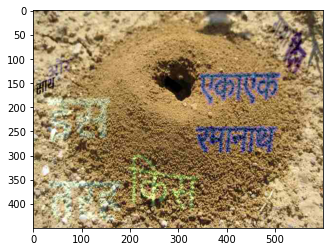

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('/content/gdrive/MyDrive/OCR_detection/0.jpg') 
  
# Output Images 
plt.imshow(img) 

In [ ]:
IMAGE = compute_input(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


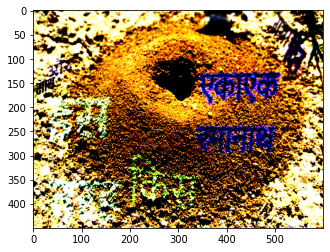

In [ ]:
plt.imshow(IMAGE)

In [ ]:
from PIL import Image

In [ ]:
im = Image.open('/content/gdrive/MyDrive/OCR_detection/0.jpg')

In [ ]:
im.save('/content/gdrive/MyDrive/OCR_detection/0_hq.jpg',quality = 100)

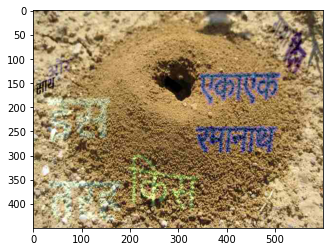

In [ ]:
plt.imshow(im)

#**EAST MODEL**
[EAST Model Detection Research Paper MIT](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://arxiv.org/pdf/1704.03155v2.pdf)

In [ ]:
print(tf.version.VERSION)

2.4.1


In [ ]:
import tensorflow as tf
import numpy as np

RESIZE_FACTOR = 2

In [ ]:
from PIL import Image 
from numpy import asarray 
  
img = Image.open('/content/gdrive/MyDrive/OCR_detection/0_hq.jpg') 
numpydata = asarray(img) 
  
print(type(numpydata)) 

print(numpydata.shape) 

<class 'numpy.ndarray'>
(450, 600, 3)


In [ ]:
a = np.array(ordinates)
print(a)

[['15.025299' '79.619064' '91.971375' '27.37761' '111.49409' '87.36937'
  '120.44259' '144.5673']
 ['195.26416' '345.93964' '346.07916' '195.40369' '296.7271' '296.54498'
  '411.9508' '412.13293']
 ['544.8015' '579.83813' '541.4978' '506.46115' '42.720642' '60.455795'
  '136.19897' '118.46382']
 ['275.59427' '311.88095' '302.1434' '265.85672' '134.48518' '159.5067'
  '173.62825' '148.60674']
 ['30.469978' '163.88913' '164.9093' '31.490135' '182.98358' '181.51782'
  '274.3758' '275.84155']
 ['33.57235' '184.95844' '185.26584' '33.879738' '354.1837' '353.62552'
  '436.9943' '437.55246']
 ['-2.6164436' '45.761616' '53.37768' '4.9996223' '155.51007' '137.70114'
  '158.39023' '176.19916']
 ['343.8163' '512.32336' '512.94495' '344.4379' '134.2903' '132.54332'
  '192.49599' '194.24297']
 ['337.52948' '504.81384' '505.13098' '337.84662' '241.95956' '240.91986'
  '291.94846' '292.98816']
 ['507.9361' '555.0499' '523.0799' '475.96606' '4.7673645' '56.682793'
  '85.69593' '33.780502']]


In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  return model

In [ ]:
MM = create_model()
MM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title Default title text
import os

class Config:

  # user = "srijeyarankesh"
  # lang = "hindi"

    image_size = [512, 512, 3]
    geometry = "QUAD" # ["RBOX", "QUAD"]
    label_method = "single" # ["single", "multiple"]
    use_formatted_data = True
    
    use_slack = True
    slack_epoch_step = 1
    slack_channel = "#updates" # "CNU04UXUN" 

    max_m_train = 12000
    data_dir = "/content/gdrive/MyDrive/data-dir"
    train_data_dir = os.path.join(data_dir, 'train')
    dev_data_dir = os.path.join(data_dir, 'dev')
    test_data_dir = os.path.join(data_dir, 'test')

    cuda = True
    lambda_score = 1
    lambda_geometry = 1
    epochs = 50
    smoothed_l1_loss_beta = 1.0
    learning_rate = 0.001
    lr_scheduler_step_size = 5000 # for every 2 epochs
    lr_scheduler_gamma = .94
    mini_batch_size = 24
    save_step = 5
    
    experiment_name = "12"
    meta_data_dir = "./experiment_meta_data" # 1
    model_dir = "./experiment_model" # epochs/save_step
    loss_dir = "./experiment_loss" # 1
    plot_dir = "./experiment_plot" # 3
    meta_data_file = os.path.join(meta_data_dir, "experiment_{}.json".format(experiment_name))
    model_file = os.path.join(model_dir, "experiment_" + experiment_name + "_epoch_{}.pth") # format during train
    loss_file = os.path.join(loss_dir, "experiment_{}.csv".format(experiment_name))
    plot_file = os.path.join(plot_dir, "experiment_" + experiment_name + "_{}.png") # format during train             

    meta_data = {"geometry":geometry,
                 "max_m_train":max_m_train,
                 "lambda_score":lambda_score,
                 "lambda_geometry":lambda_geometry,
                 "epochs":epochs, 
                 "smoothed_l1_loss_beta": smoothed_l1_loss_beta,
                 "learning_rate":learning_rate,
                 "lr_scheduler_step_size": lr_scheduler_step_size,
                 "lr_scheduler_gamma": lr_scheduler_gamma,
                 "mini_batch_size":mini_batch_size,
                 "comments": """
                 LR:0.1, 
                 Model: xavier init;
                 Score Loss:  cross entropy with beta; 
                 Geo Loss: L1 loss with text mask normalized by 8*512
                 """
                }
    
    trained_model_file = "./experiment_model/experiment_{}_epoch_{}.pth".format("11", "50") 
    eval_mini_batch_size = 16
    test_mini_batch_size = 16
    

    score_threshold = 0.7
    nms_method = "iou" # ["overlap", "iou"]
    iou_threshold = 0.05
    max_boxes = 10

In [ ]:
from tqdm import tqdm
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sympy import Polygon, Point
import cv2
#formatting the data
config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

image_size = config['image_size']
geometry = config["geometry"]
label_method = config["label_method"]

train_data_dir = config["train_data_dir"]
dev_data_dir = config["dev_data_dir"]

n_H, n_W, n_C = image_size


def quads_to_rboxes(quads_coords):

    raise NotImplementedError()
    

def load_shapes_coords(annotation_path):

    

    quads_coords = pd.read_csv(annotation_path, header=None)
    quads_coords = quads_coords.iloc[:,:-1].values # [n_box, 8]
    quads_coords = quads_coords.reshape(-1, 4, 2)
    
    if geometry == "QUAD":
        shapes_coords = quads_coords
    elif geometry == "RBOX":
        shapes_coords =  quads_to_rboxes(coords)
    else:
        raise ValueError("Invalid Geometry")
    
    return shapes_coords


representation = geometry + "_" + label_method

print("Formatting data in", representation, "...")
if representation == "QUAD_single":
    
    
    for data_dir in [train_data_dir, dev_data_dir]:
        
        print("Processing", data_dir, "...")
        annotations_dir = os.path.join(data_dir, "annotations_formatted")
        annotations_representation_dir = os.path.join(data_dir, "annotations_formatted_" + representation)
        
        if not os.path.exists(annotations_representation_dir):
            os.mkdir(annotations_representation_dir)
            
        for annotation_file in tqdm(os.listdir(annotations_dir)):
            
            #geometry_map_raw = np.zeros([n_H, n_W, 8])
            geometry_map = np.zeros([128,128, 8])
            
            annotation_path = os.path.join(annotations_dir, annotation_file)
            annotation_representation_path = os.path.join(annotations_representation_dir, annotation_file)
            shapes_coords = load_shapes_coords(annotation_path)
            shapes_centre = shapes_coords.mean(axis=1).astype(np.int32)
            
            for shape_coords, shape_centre in zip(shapes_coords, shapes_centre): # shape_coords -> [4, 2], shape_centre -> [2]
                c_h, c_w = shape_centre
                geometry_map[c_h//4, c_w//4] = shape_coords.flatten() # [8]
            geometry_map = geometry_map.reshape(-1, 8)               
                
            
            
            np.savetxt(annotation_representation_path, geometry_map, fmt="%d", delimiter=",")
        
elif representation == "QUAD_multiple":
    
    for data_dir in [dev_data_dir, train_data_dir]:
        
        print("Processing", data_dir, "...")
        annotations_dir = os.path.join(data_dir, "annotations_formatted")
        annotations_representation_dir = os.path.join(data_dir, "annotations_formatted_" + representation)
        
        if not os.path.exists(annotations_representation_dir):
            os.mkdir(annotations_representation_dir)
            
        for annotation_file in tqdm(os.listdir(annotations_dir)):
            
            
            geometry_map = np.zeros([128,128, 8])
            
            annotation_path = os.path.join(annotations_dir, annotation_file)
            annotation_representation_path = os.path.join(annotations_representation_dir, annotation_file)
            shapes_coords = load_shapes_coords(annotation_path) # [-1, 4, 2]
    
           
            
            for shape_coords in shapes_coords: # shape_coords: [4, 2]
                rough_map = np.zeros([128, 128], dtype="int32") # [128, 128]
                scaled_shape_coords = (shape_coords // 4).astype("int32")# [4, 2]
                cv2.fillPoly(rough_map, [scaled_shape_coords], 1)
                points = np.argwhere(rough_map)
                for (y,x) in points:  # x, y -> image coords
                    shift = shape_coords - np.array([x*4, y*4])
                    shift = shift.flatten().astype("int32")
                    geometry_map[y, x] = shift
                
            
            
            geometry_map = geometry_map.reshape(-1, 8)  

            np.savetxt(annotation_representation_path, geometry_map, fmt="%d", delimiter=",")

else:
    
    raise NotImplementedError()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import math

config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

class EAST(nn.Module):


    def __init__(self, geometry="QUAD", label_method="single"):
        super(EAST, self).__init__()

        self.geometry = geometry
        self.label_method = label_method
        self.representation = geometry + "_" + label_method

        ## Feature Extraction Essentials
        # conv1
        self.conv1_1 = nn.Conv2d(3, 64, 3, padding=1)
        self.relu1_1 = nn.ReLU(inplace=True)
        self.conv1_2 = nn.Conv2d(64, 64, 3, padding=1)
        self.relu1_2 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/2

        # conv2
        self.conv2_1 = nn.Conv2d(64, 128, 3, padding=1)
        self.relu2_1 = nn.ReLU(inplace=True)
        self.conv2_2 = nn.Conv2d(128, 128, 3, padding=1)
        self.relu2_2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/4

        # conv3
        self.conv3_1 = nn.Conv2d(128, 256, 3, padding=1)
        self.relu3_1 = nn.ReLU(inplace=True)
        self.conv3_2 = nn.Conv2d(256, 256, 3, padding=1)
        self.relu3_2 = nn.ReLU(inplace=True)
        self.conv3_3 = nn.Conv2d(256, 256, 3, padding=1)
        self.relu3_3 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/8

        # conv4
        self.conv4_1 = nn.Conv2d(256, 512, 3, padding=1)
        self.relu4_1 = nn.ReLU(inplace=True)
        self.conv4_2 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu4_2 = nn.Conv2d(512, 512, 3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu4_3 = nn.ReLU(inplace=True)
        self.pool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)  # 1/16

        # conv5
        self.conv5_1 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu5_1 = nn.ReLU(inplace=True)
        self.conv5_2 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu5_2 = nn.ReLU(inplace=True)
        self.conv5_3 = nn.Conv2d(512, 512, 3, padding=1)
        self.relu5_3 = nn.ReLU(inplace=True)
        self.pool5 = nn.MaxPool2d(2, stride=2, ceil_mode=True) # 1/32


        ## Feature Merging Essentials
        layer1 = nn.Sequential(nn.Conv2d(1024, 256, 1), nn.BatchNorm2d(256), nn.ReLU(inplace=True),
                               nn.Conv2d(256, 256, 3, padding=1), nn.BatchNorm2d(256), nn.ReLU(inplace=True))

        layer2 = nn.Sequential(nn.Conv2d(512, 128, 1), nn.BatchNorm2d(128), nn.ReLU(inplace=True),
                               nn.Conv2d(128, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(inplace=True))

        layer3 = nn.Sequential(nn.Conv2d(256, 32, 1), nn.BatchNorm2d(32), nn.ReLU(inplace=True),
                               nn.Conv2d(32, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(inplace=True))

        layer4 = nn.Sequential(nn.Conv2d(32, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(inplace=True))

        self.feature_convs = nn.ModuleList([layer1, layer2, layer3, layer4])

        self.unpool = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)

        ## Output Layer Essentials
        self.out_score = nn.Sequential(nn.Conv2d(32, 1, 1), nn.Sigmoid())
        if self.representation == "QUAD_single":
            self.out_geo = nn.Sequential(nn.Conv2d(32, 8, 1), nn.Sigmoid())
        elif self.representation == "QUAD_multiple":
            self.out_geo = nn.Sequential(nn.Conv2d(32, 8, 1))
        elif self.representation == "RBOX_single":
            self.out_geo = nn.Sequential(nn.Conv2d(32, 4, 1), nn.Sigmoid())
            self.out_angle = nn.Sequential(nn.Conv2d(32, 1, 1), nn.Sigmoid())

        self._init_weights()

        vgg16 = torchvision.models.vgg16(pretrained=True)

        self.copy_params_from_vgg16(vgg16)

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                torch.nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    m.bias.data.zero_()

    def copy_params_from_vgg16(self, vgg16):
        features = [
            self.conv1_1, self.relu1_1,
            self.conv1_2, self.relu1_2,
            self.pool1,
            self.conv2_1, self.relu2_1,
            self.conv2_2, self.relu2_2,
            self.pool2,
            self.conv3_1, self.relu3_1,
            self.conv3_2, self.relu3_2,
            self.conv3_3, self.relu3_3,
            self.pool3,
            self.conv4_1, self.relu4_1,
            self.conv4_2, self.relu4_2,
            self.conv4_3, self.relu4_3,
            self.pool4,
            self.conv5_1, self.relu5_1,
            self.conv5_2, self.relu5_2,
            self.conv5_3, self.relu5_3,
            self.pool5,
        ]

        for l1, l2 in zip(vgg16.features, features):
            if isinstance(l1, nn.Conv2d) and isinstance(l2, nn.Conv2d):
                assert l1.weight.size() == l2.weight.size()
                assert l1.bias.size() == l2.bias.size()
                l2.weight.data = l1.weight.data
                l2.bias.data = l1.bias.data

    def forward(self, x):
        h = x
        h = self.relu1_1(self.conv1_1(h))
        h = self.relu1_2(self.conv1_2(h))
        h = self.pool1(h)

        h = self.relu2_1(self.conv2_1(h))
        h = self.relu2_2(self.conv2_2(h))
        h = self.pool2(h)
        pool2 = h

        h = self.relu3_1(self.conv3_1(h))
        h = self.relu3_2(self.conv3_2(h))
        h = self.relu3_3(self.conv3_3(h))
        h = self.pool3(h)
        pool3 = h

        h = self.relu4_1(self.conv4_1(h))
        h = self.relu4_2(self.conv4_2(h))
        h = self.relu4_3(self.conv4_3(h))
        h = self.pool4(h)
        pool4 = h

        h = self.relu5_1(self.conv5_1(h))
        h = self.relu5_2(self.conv5_2(h))
        h = self.relu5_3(self.conv5_3(h))
        h = self.pool5(h)
        pool5 = h


        f = [pool5, pool4, pool3, pool2]
        g = [None, None, None, None]
        h = [None, None, None, None]

        for i in range(4):

            if i == 0:
                h[i] = f[i]
            else:
                concat = torch.cat([g[i - 1], f[i]], dim=1)
                h[i] = self.feature_convs[i - 1](concat)

            if i <= 2:
                g[i] = self.unpool(h[i])
            else:
                g[i] = self.feature_convs[i](h[i])


        score_map = self.out_score(g[3])
        geo_map = self.out_geo(g[3])
        if self.representation == "QUAD_single":
            geometry_map = geo_map * 512
        elif self.representation == "QUAD_multiple":
            geometry_map = geo_map
        elif self.representation == "RBOX_single":
            angle_map = self.out_angle(g[3])
            angle_map = (angle_map - 0.5) * math.pi / 2
            geometry_map = torch.cat((geo_map, angle_map), dim=1)

        #print("pool1", pool5.size())
        #print("h1", h[0].size())
        #print("g1", g[0].size())

        return score_map, geometry_map


In [ ]:
from tqdm import tqdm
import time
#dataset manipulation
config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

image_size = config['image_size']
geometry = config['geometry']
label_method = config['label_method']
use_formatted_data = config['use_formatted_data']

max_m_train = config['max_m_train']

representation = geometry + "_"+ label_method

n_H, n_W, n_C = image_size

if geometry == "RBOX":
    raise NotImplementedError("Only implemented for the QUAD geometry")
if label_method == "multiple":
    raise NotImplementedError("Only implemented for the single label method")


def list_images(images_dir, store=False):
 
    names = list(os.listdir(images_dir))
    image_names = names[:max_m_train]
    np.random.shuffle(image_names)    

    if store:
        data_dir = "/".join(images_dir.split("/")[:-1])
        file = os.path.join(data_dir, 'train_image_names.csv')
        with open(file, 'w', newline='') as myfile:
            wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
            wr.writerow(image_names)
 
    return image_names


def quads_to_rboxes(quads_coords):

    raise NotImplementedError()


def load_shapes_coords(annotation_path):

    """
    > correct the order of the coords of a quad
    """

    quads_coords = pd.read_csv(annotation_path, header=None)
    quads_coords = quads_coords.iloc[:,:-1].values # [n_box, 8]
    quads_coords = quads_coords.reshape(-1, 4, 2)
    
    if geometry == "QUAD":
        shapes_coords = quads_coords
    elif geometry == "RBOX":
        shapes_coords =  quads_to_rboxes(coords)
    else:
        raise ValueError("Invalid Geometry")
    
    return shapes_coords


def load_image(image_path):

    image = cv2.imread(image_path)
    image = image[:, :, ::-1] # BGR to RGB
    image = image.astype(np.float32)
    image = np.moveaxis(image, 2, 0) # channel_last to channel_first
    return image


def load_score_and_geometry_map_raw(annotation_path):

    shapes_coords = load_shapes_coords(annotation_path)
    score_map = np.zeros([1, 128, 128])
    geometry_map = np.zeros([8, 128, 128])
    score_map_raw = np.zeros([n_H, n_W, 1])
    geometry_map_raw = np.zeros([n_H, n_W, 8])
    
    if representation == "QUAD_single":
            
        shapes_centre = np.mean(shapes_coords, axis=1).astype(np.int32)
        #print("shapes_coords", shapes_coords.shape, "\n", shapes_coords)
        #print("shapes_centre", shapes_centre.shape, "\n", shapes_centre)
        for shape_coords, shape_centre in zip(shapes_coords, shapes_centre): # shape_coords -> [4, 2], shape_centre -> [2]
            c_h, c_w = shape_centre
            score_map_raw[c_h, c_w, 0] = 1
            geometry_map_raw[c_h, c_w] = shape_coords.flatten() # [8]

        score_map_raw = np.moveaxis(score_map_raw, 2, 0) # channel_last to channel_first
        geometry_map_raw = np.moveaxis(geometry_map_raw, 2, 0) # channel_last to channel_first

        max_pool_2d = nn.MaxPool2d((4,4), stride=4)
        score_map_raw = torch.from_numpy(score_map_raw)
        score_map = max_pool_2d(score_map_raw)
        geometry_map_raw = torch.from_numpy(geometry_map_raw)
        geometry_map = max_pool_2d(geometry_map_raw)

        #print("score_map", score_map.shape, "\n", score_map.sum())
        #print("geometry_map", geometry_map.shape, "\n", (geometry_map.sum(axis=0)>0).sum())
        #time.sleep(10)
                                       
    elif representation == "QUAD_multiple":
        
        raise NotImplementedError()
        
    elif representation == "RBOX_single":
        
        raise NotImplementedError()
        
    elif representation == "RBOX_multiple":
        
        raise NotImplementedError()
            
    else:
        
        raise ValueError("Invalid representation: " + representation)

    assert score_map.shape == (1, 128, 128)
    assert geometry_map.shape == (8, 128, 128)
    
    return score_map, geometry_map


def load_score_and_geometry_map_formatted(annotation_path):
    
    score_map = np.zeros([1, 128, 128])
    geometry_map = np.zeros([8, 128, 128])
    
    if representation == "QUAD_single" or representation == "QUAD_multiple":
        
        geometry_map = pd.read_csv(annotation_path, header=None).values # [(128*128), 8]
        geometry_map = geometry_map.reshape(128, 128, 8)
        geometry_map = np.moveaxis(geometry_map, 2, 0)
        score_map = (geometry_map.sum(axis=0) > 0).astype(np.int).reshape(1, 128, 128)
        
    elif representation == "RBOX_single":
        
        raise NotImplementedError()
        
    elif representation == "RBOX_multiple":
        
        raise NotImplementedError()
            
    else:
        
        raise ValueError("Invalid representation: " + representation)
        
    assert score_map.shape == (1, 128, 128)
    assert geometry_map.shape == (8, 128, 128)
    
    return score_map, geometry_map
    

class ImageDataSet(torch.utils.data.Dataset):

    def __init__(self, images_dir, annotations_dir):

        self.images_dir = images_dir
        self.annotations_dir = annotations_dir 
        self.image_names = list_images(images_dir, store=True)

    def __getitem__(self, index):

        image_name = self.image_names[index]
        image_path = os.path.join(self.images_dir, image_name)
        image = load_image(image_path) # image -> [3, 512, 512]
        
        annotation_name = image_name.split(".")[0] + ".csv"
        annotation_path = os.path.join(self.annotations_dir, annotation_name)
        
        if use_formatted_data:
            score_map, geometry_map = load_score_and_geometry_map_formatted(annotation_path) # score_map -> [1, 128, 128]; geometry_map -> [8, 128, 128]
        else:
            score_map, geometry_map = load_score_and_geometry_map_raw(annotation_path) # score_map -> [1, 128, 128]; geometry_map -> [8, 128, 128]
        
        return image_name, image, score_map, geometry_map

    def __len__(self):
        
        return len(self.image_names)
    
    
class ImageTestDataSet(torch.utils.data.Dataset):

    def __init__(self, images_dir):

        self.images_dir = images_dir
        self.image_names = list_images(images_dir, store=False)

    def __getitem__(self, index):

        image_name = self.image_names[index]
        image_path = os.path.join(self.images_dir, image_name)
        # image -> [3, 512, 512]
        image = load_image(image_path)             
        
        return image_name, image

    def __len__(self):
        
        return len(self.image_names)


In [ ]:
from config import Config
import torch
import torch.nn as nn
import torch.nn.functional as F

config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}
geometry = config['geometry']
label_method = config['label_method']
image_size = config['image_size']
n_H, n_W, n_C = image_size
lambda_score = config['lambda_score']
lambda_geometry = config['lambda_geometry']

if geometry == "RBOX":
    raise NotImplementedError("Only implemented for the QUAD geometry")
if label_method == "multiple":
    raise NotImplementedError("Only implemented for the single label method")

class LossFunction(nn.Module):

    def __init__(self):

        super(LossFunction, self).__init__()
        self.loss_of_score = None
        self.loss_of_geometry = None
        self.loss = None


    def compute_geometry_beta(self, y_true_geometry_cell):

        D = []
        for i in range(0, 8, 2): # 0,2,4,6
            indices = [i, i+1, (i+2)%8, (i+3)%8]
            x1, y1, x2, y2 = y_true_geometry_cell[indices]
            d = (x1 - x2) ** 2 + (y1 - y2) ** 2
            D.append(d)
        D = torch.Tensor(D)

        return torch.sqrt(torch.min(D))


    def compute_score_loss(self, Y_true_score, Y_pred_score):

        
        m = Y_true_score.shape[0]
        n_cells = torch.numel(Y_true_score)
        n_pos_cells = Y_true_score.sum()
        n_neg_cells = n_cells - n_pos_cells
        beta = 1 - (Y_true_score.sum()/torch.numel(Y_true_score)) # ratio of 0s
        loss_of_score_pos = -beta * Y_true_score * torch.log(Y_pred_score) # [m, 1, 128, 128]
        loss_of_score_neg = -(1 - beta) * (1 - Y_true_score) * torch.log(1 - Y_pred_score) # [m, 1, 128, 128]
        normalization_factor = (beta * n_pos_cells) + ((1-beta)* n_neg_cells)
        loss_of_score = torch.sum(loss_of_score_pos + loss_of_score_neg) / normalization_factor

        return loss_of_score


    def compute_geometry_loss(self, Y_true_geometry, Y_pred_geometry, Y_true_score, smoothed_l1_loss_beta=1):

        
        beta = smoothed_l1_loss_beta
        diff = torch.abs(Y_true_geometry*Y_true_score - Y_pred_geometry*Y_true_score) # multiply with text mask
        diff = diff / 512
        #diff = torch.where(diff < beta, 0.5 * diff ** 2 / beta, diff - 0.5 * beta)
        loss_of_geometry = diff.sum()
        loss_of_geometry /= float(Y_true_score.sum()*8)

        return loss_of_geometry



    def compute_loss(self, Y_true_score, Y_pred_score, Y_true_geometry, Y_pred_geometry, smoothed_l1_loss_beta=1):
        
        #print("Y_true_geometry.max():", torch.max(Y_true_geometry).item())
        #print("Y_pred_geometry.max():", torch.max(Y_pred_geometry).item())
        self.loss_of_score = self.compute_score_loss(Y_true_score, Y_pred_score)
        self.loss_of_geometry = self.compute_geometry_loss(Y_true_geometry, 
                                                           Y_pred_geometry, 
                                                           Y_true_score, 
                                                           smoothed_l1_loss_beta=smoothed_l1_loss_beta)
        self.loss = lambda_score * self.loss_of_score + lambda_geometry * self.loss_of_geometry
        return self.loss

In [ ]:
import torch
import numpy as np
import cv2
from sympy import Polygon
from sympy.geometry import intersection
from tqdm import tqdm

config = {k:v for k,v in vars(Config).items() if not k.startswith("__")}

score_threshold = config['score_threshold']
nms_method = config['nms_method']
iou_threshold = config['iou_threshold']
max_boxes = config['max_boxes']


def compute_iou_using_sympy(gmap_a, gmap_b):
    
    gmap_a = [(x, y) for x, y in gmap_a.reshape(-1, 2)]
    gmap_b = [(x, y) for x, y in gmap_b.reshape(-1, 2)]
     
    poly_a = Polygon(*gmap_a)
    poly_b = Polygon(*gmap_b)
    
    #print([map(sympy.Float, p) for p in poly_a.vertices])
    #print([map(sumpy.Float, p) for p in poly_b.vertices])

    intersection_ = intersection(poly_a, poly_b)
    #print(intersection_)
    #print([tuple(p) for p in intersection_.vertices])
    area_int = np.abs(np.float(intersection(poly_a, poly_b)))
    area_un = np.abs(np.float(poly_a.area)) + np.abs(np.float(poly_b.area)) + area_int + 10e-6
    iou = area_int/area_un
    
    return iou


def compute_iou_using_cv2(gmap_a, gmap_b):
    
    gmap_a = gmap_a.reshape(-1, 2).astype(np.int32)
    gmap_b = gmap_b.reshape(-1, 2).astype(np.int32)
     
    ref_map_a = np.zeros(shape=(512, 512))
    ref_map_b = np.zeros_like(ref_map_a)
    ref_map_un = np.zeros_like(ref_map_a)

    cv2.fillPoly(ref_map_a, [gmap_a], 1)
    cv2.fillPoly(ref_map_b, [gmap_b], 1)
    cv2.fillPoly(ref_map_un, [gmap_a, gmap_b], 1)

    area_a = ref_map_a.sum()
    area_b = ref_map_b.sum()
    area_un = ref_map_un.sum()
    area_int = area_a + area_b - area_un
    iou = area_int/area_un
    
    #print(area_a, area_b, area_un, area_int, iou)
    
    return iou


def check_overlap(gmap_a, gmap_b):

    gmap_a = [(x, y) for x, y in gmap_a.reshape(-1, 2)]
    gmap_b = [(x, y) for x, y in gmap_b.reshape(-1, 2)]
     
    poly_a = Polygon(*gmap_a)
    poly_b = Polygon(*gmap_b)

    for point in poly_a.vertices:
        if poly_b.encloses(point):
            return 1

    return -1


if nms_method == "iou":
    filter_function = compute_iou_using_cv2
    max_threshold = iou_threshold
elif nms_method == "overlap":
    filter_function = check_overlap
    max_threshold = 0

def non_maximal_supression(score_maps_pred, geometry_maps_pred, score_threshold=0.7, iou_threshold=0.4, max_boxes=10):
    """
    score_maps_pred: [m, 1, 128, 128]
    geometry_maps_pred: [m, 8, 128, 128]
    """
    mini_batch_boxes_pred = []
    for score_map_pred, geometry_map_pred in zip(score_maps_pred, geometry_maps_pred): 
        # score_map_pred: [1, 128, 128]; geometry_map_pred: [8, 128, 128]
        
        score_mask = score_map_pred > score_threshold # [1, 128, 128]
        #print(score_mask)
        score_mask_repeat = np.repeat(score_mask, 8, axis=0) # [8, 128, 128]
        #print(score_mask_repeat)
        
        score_map_pred_selected = score_map_pred[score_mask] # [sel]
        #print()
        #print(score_map_pred_selected.shape)
        #print(score_map_pred_selected)
        selection_order = np.argsort(score_map_pred_selected)[::-1] # [sel]
        #print(selection_order)
        
        geometry_map_pred_selected = geometry_map_pred[score_mask_repeat].reshape(8, -1).T # [-1, 8]
        #print()
        #print(geometry_map_pred_selected.shape)
        #print(geometry_map_pred_selected)
        geometry_map_pred_selected = geometry_map_pred_selected[selection_order] # [-1, 8]
        #print(geometry_map_pred_selected)
        
        if len(geometry_map_pred_selected):
            geometry_map_pred_filtered = [geometry_map_pred_selected[0]]
            for gmap1 in geometry_map_pred_selected[1:]: # hiring

                hired = True
                for gmap2 in geometry_map_pred_filtered: # Existing

                    val = filter_function(gmap1, gmap2)
                    if val >= max_threshold:
                        hired = False
                        break

                if hired == True:
                    geometry_map_pred_filtered.append(gmap1)
                    if len(geometry_map_pred_filtered) >= max_boxes:
                        break

            #geometry_map_pred_filtered = geometry_map_pred_filtered[:max_boxes]
            mini_batch_boxes_pred.append(np.array(geometry_map_pred_filtered).astype(np.int).tolist())
    
    return mini_batch_boxes_pred


def send_message(slack_client, channel, message): 
    
    response = slack_client.chat_postMessage(
        channel=channel,
        text=message,
        username='Deep Updater',
        icon_emoji=':robot_face:')
    
    return response


def send_picture(slack_client, channel, title, picture, message=""): 
    
    response = slack_client.files_upload(
        channels=channel,
        title=title,
        file=picture,
        message=message,
        username='Deep Updater',
        icon_emoji=':robot_face:')
    
    return response


def draw_bbs(image, bbs, color=(0, 0, 255), thickness=1): # BGR
    
    for bb in bbs:
        
        image = cv2.line(image, (bb[0],bb[1]), (bb[2],bb[3]), color, thickness=thickness)
        image = cv2.line(image, (bb[2],bb[3]), (bb[4],bb[5]), color, thickness=thickness)
        image = cv2.line(image, (bb[4],bb[5]), (bb[6],bb[7]), color, thickness=thickness)
        image = cv2.line(image, (bb[6],bb[7]), (bb[0],bb[1]), color, thickness=thickness)
        
    return image


def reverse_shift(geometry_maps_pred): # [8, 128, 128]

	geometry_maps_pred = np.moveaxis(geometry_maps_pred, 0, 2) # [128, 128, 8]
	geometry_maps_pred = geometry_maps_pred.reshape(128, 128, 4, 2)

	for i in range(128):
		for j in range(128):
			geometry_maps_pred[i, j] = geometry_maps_pred[i, j] + np.array([4*i, 4*j])

	geometry_maps_pred = geometry_maps_pred.reshape(128, 128, 8)
	geometry_maps_pred = np.moveaxis(geometry_maps_pred, 2, 0) # [8, 128, 128]

	return geometry_maps_pred